In [ ]:
import numpy as np

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X, Y = mnist['data'], mnist['target']
Y = Y.astype(int)
m = len(X)
Y = Y.reshape(m,1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1004)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
class LogisticRegression:
# 1. 초기화 함수
    def __init__(self, lr = 0.1, epochs = 1000):
        self.lr = lr
        self.epochs = epochs
        self.theta = None

# 2.기본 함수
    def sigmoid(self, z):
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, Y, Y_hat):
        m = len(Y)
        return -1/m * np.sum(Y * np.log(Y_hat + 1e-8) + (1 - Y)* np.log(1 - Y_hat + 1e-8))

# 3. 훈련 함수
    def fit(self, X, Y):
        m, n = X.shape
        X = np.hstack([np.ones((m,1)),X])
        self.theta = np.zeros(n + 1).reshape(n + 1, 1)

        losses = []
        for i in range (self.epochs):
            z = np.dot(X, self.theta)
            Y_hat = self.sigmoid(z)
            gradient = (1/m) * X.T.dot(Y_hat - Y)
            self.theta = self.theta - self.lr * gradient

            loss = self.compute_loss(Y, Y_hat)
            losses.append(loss)

        return losses

# 4. 추론 함수
    def predict_probability(self, X):
        m = X.shape[0]
        X = np.hstack([np.ones((m,1)),X])
        return self.sigmoid(np.dot(X, self.theta))

    def predict(self, X, threshold = 0.5 ):
        probability = self.predict_probability(X)
        return (probability >= threshold).astype(int)

In [ ]:
all_losses = []
classifiers = []

for c in range(10):
    print(f"Training for class {c}")
    Y_binary = (Y_train == c).astype(int)

    model = LogisticRegression(lr=0.1, epochs=500)
    losses = model.fit(X_train, Y_binary)
    classifiers.append(model)
    all_losses.append(losses)


Training for class 0
Training for class 1
Training for class 2
Training for class 3
Training for class 4
Training for class 5
Training for class 6
Training for class 7
Training for class 8
Training for class 9


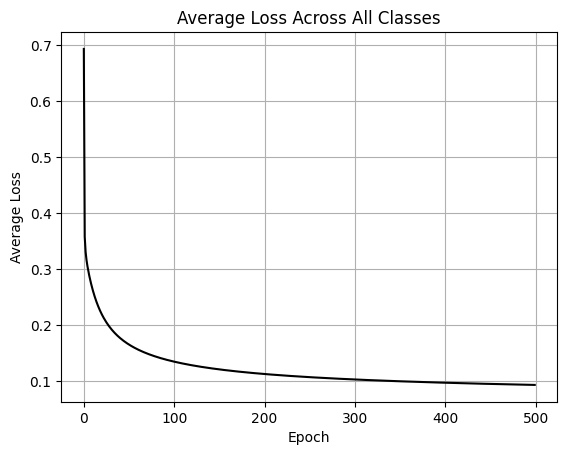

In [ ]:
# loss 함수 출력
import matplotlib.pyplot as plt

avg_loss_per_epoch = np.mean(all_losses, axis=0)

plt.plot(avg_loss_per_epoch, color='black')
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.title("Average Loss Across All Classes")
plt.grid(True)
plt.show()

In [148]:

def predict_multiclass(classifiers, X):
    preds = np.zeros((X.shape[0], 10))
    for i, clf in enumerate(classifiers):
        preds[:, i] = clf.predict(X).flatten()
    return np.argmax(preds, axis=1)

Y_train_hat = predict_multiclass(classifiers, X_train)

In [149]:
from sklearn.metrics import confusion_matrix, f1_score

cm = confusion_matrix(Y_train, Y_train_hat)
print(cm)

f1_macro = f1_score(Y_train, Y_train_hat, average='macro')
f1_micro = f1_score(Y_train, Y_train_hat, average='micro')

print(f"Macro F1 Score: {f1_macro:.4f}")
print(f"Micro F1 Score: {f1_micro:.4f}")

[[4725    0    2    0    5    2   10    1    9    0]
 [ 255 5210   16    3    0    8    5    3   39    1]
 [ 842   54 3704   37   57    0   40   42   80    8]
 [1010   17   74 3776    4   52   16   27   36   22]
 [ 774   10   11    4 3872    2   16    3   19   75]
 [1354   41    7  213   38 2674   44    9   71   41]
 [ 537   23   34    0   48   29 4103    0   13    0]
 [ 573   54   41   30   48    5    0 4197    7   55]
 [1869   62   10   37    2   36    9    4 2787    9]
 [1367   20   15   36   74   13    0  100    6 3277]]
Macro F1 Score: 0.8022
Micro F1 Score: 0.7821
